# Formula dari IMDB dengan Weighted Rating

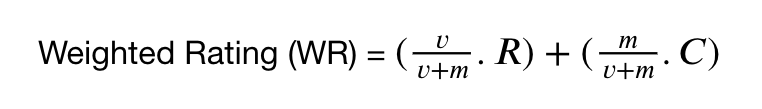

dimana,

v: jumlah votes untuk film tersebut

m: jumlah minimum votes yang dibutuhkan supaya dapat masuk dalam chart

R: rata-rata rating dari film tersebut

C: rata-rata jumlah votes dari seluruh semesta film



# [Import Library dan File Unloading](https://academy.dqlab.id/main/projectcode/212/378/1876?pr=)

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

#lakukan pembacaan dataset
movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t') #untuk menyimpan title_basics.tsv
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t') #untuk menyimpan title.ratings.tsv

# [5 Data teratas dari table movie](https://academy.dqlab.id/main/livecode/212/379/1877?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

print(movie_df.head())

      tconst  titleType                                      primaryTitle  \
0  tt0221078      short                         Circle Dance, Ute Indians   
1  tt8862466  tvEpisode  ¡El #TeamOsos va con todo al "Reality del amor"!   
2  tt7157720  tvEpisode                                     Episode #3.41   
3  tt2974998  tvEpisode                         Episode dated 16 May 1987   
4  tt2903620  tvEpisode                  Frances Bavier: Aunt Bee Retires   

                                      originalTitle  isAdult startYear  \
0                         Circle Dance, Ute Indians        0      1898   
1  ¡El #TeamOsos va con todo al "Reality del amor"!        0      2018   
2                                     Episode #3.41        0      2016   
3                         Episode dated 16 May 1987        0      1987   
4                  Frances Bavier: Aunt Bee Retires        0      1973   

  endYear runtimeMinutes             genres  
0      \N             \N  Documentary,Short  


# [Info Data dari Setiap Kolom](https://academy.dqlab.id/main/livecode/212/379/1922?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB
None


# [Pengecekan Data dengan Nilai NULL](https://academy.dqlab.id/main/livecode/212/379/1923?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

print(movie_df.isnull().sum())

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64


# [Analisis Kolom dengan data bernilai NULL - part 1](https://academy.dqlab.id/main/livecode/212/379/1931?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

print(movie_df.loc[(movie_df['primaryTitle'].isnull())|(movie_df['originalTitle'].isnull())])

          tconst  titleType primaryTitle originalTitle  isAdult startYear  \
9000  tt10790040  tvEpisode          NaN           NaN        0      2019   
9001  tt10891902  tvEpisode          NaN           NaN        0      2020   
9002  tt11737860  tvEpisode          NaN           NaN        0      2020   
9003  tt11737862  tvEpisode          NaN           NaN        0      2020   
9004  tt11737866  tvEpisode          NaN           NaN        0      2020   
9005  tt11737872  tvEpisode          NaN           NaN        0      2020   
9006  tt11737874  tvEpisode          NaN           NaN        0      2020   
9007   tt1971246  tvEpisode          NaN           NaN        0      2011   
9008   tt2067043  tvEpisode          NaN           NaN        0      1965   
9009   tt4404732  tvEpisode          NaN           NaN        0      2015   
9010   tt5773048  tvEpisode          NaN           NaN        0      2015   
9011   tt8473688  tvEpisode          NaN           NaN        0      1987   

# [Membuang Data dengan Nilai NULL - part 1](https://academy.dqlab.id/main/livecode/212/379/1932?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull())&(movie_df['originalTitle'].notnull())]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9011


# [Analisis Kolom dengan data bernilai NULL - part 2](https://academy.dqlab.id/main/livecode/212/379/1933?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]

print(movie_df.loc[movie_df['genres'].isnull()])

          tconst  titleType  \
9014  tt10233364  tvEpisode   
9015  tt10925142  tvEpisode   
9016  tt10970874  tvEpisode   
9017  tt11670006  tvEpisode   
9018  tt11868642  tvEpisode   
9019   tt2347742  tvEpisode   
9020   tt3984412  tvEpisode   
9021   tt8740950  tvEpisode   
9022   tt9822816  tvEpisode   
9023   tt9900062  tvEpisode   
9024   tt9909210  tvEpisode   

                                           primaryTitle originalTitle  \
9014  Rolling in the Deep Dish\tRolling in the Deep ...             0   
9015  The IMDb Show on Location: Star Wars Galaxy's ...             0   
9016  Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...             0   
9017  ...ein angenehmer Unbequemer...\t...ein angene...             0   
9018  GGN Heavyweight Championship Lungs With Mike T...             0   
9019  No sufras por la alergia esta primavera\tNo su...             0   
9020  I'm Not Going to Come Last, I'm Just Going to ...             0   
9021  Weight Loss Resolution Restart - Ins 

# [Membuang Data dengan Nilai NULL - part 2](https://academy.dqlab.id/main/livecode/212/379/1934?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]

#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[movie_df['genres'].notnull()]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9000


# [Mengubah Nilai '\\N'](https://academy.dqlab.id/main/livecode/212/379/1935?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]

#mengubah nilai '\\N' pada startYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['startYear'] = movie_df['startYear'].replace('\\N',np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
print(movie_df['startYear'].unique()[:5])

#mengubah nilai '\\N' pada endYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['endYear'] = movie_df['endYear'].replace('\\N',np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
print(movie_df['endYear'].unique()[:5])

#mengubah nilai '\\N' pada runtimeMinutes menjadi np.nan dan cast kolomnya menjadi float64
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N',np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')
print(movie_df['runtimeMinutes'].unique()[:5])

[1898. 2018. 2016. 1987. 1973.]
[  nan 2005. 1955. 2006. 1999.]
[nan 29.  7. 23. 85.]


# [Mengubah nilai genres menjadi list](https://academy.dqlab.id/main/livecode/212/379/1936?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
    #ubah menjadi list apabila ada data pada kolom genre
        return x.split(',')
    else: 
    #jika tidak ada data, ubah menjadi list kosong
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

# [Menampilkan 5 data teratas](https://academy.dqlab.id/main/livecode/212/380/1937?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

print(rating_df.head())

      tconst  averageRating  numVotes
0  tt0000001            5.6      1608
1  tt0000002            6.0       197
2  tt0000003            6.5      1285
3  tt0000004            6.1       121
4  tt0000005            6.1      2050


# [Menampilkan info data](https://academy.dqlab.id/main/livecode/212/380/1938?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

print(rating_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB
None


# [Inner Join table movie dan table rating](https://academy.dqlab.id/main/livecode/212/381/1939?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

#Lakukan join pada kedua table
movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')

#Tampilkan 5 data teratas
print(movie_rating_df.head())

#Tampilkan tipe data dari tiap kolom
print(movie_rating_df.info())

      tconst  titleType              primaryTitle             originalTitle  \
0  tt0043745      short                 Lion Down                 Lion Down   
1  tt0167491      video         Wicked Covergirls         Wicked Covergirls   
2  tt6574096  tvEpisode      Shadow Play - Part 2      Shadow Play - Part 2   
3  tt6941700  tvEpisode              RuPaul Roast              RuPaul Roast   
4  tt7305674      video  UCLA Track & Field Promo  UCLA Track & Field Promo   

   isAdult  startYear  endYear  runtimeMinutes  \
0        0     1951.0      NaN             7.0   
1        1     1998.0      NaN            85.0   
2        0     2017.0      NaN            22.0   
3        0     2017.0      NaN             NaN   
4        0     2017.0      NaN             NaN   

                           genres  averageRating  numVotes  
0     [Animation, Comedy, Family]            7.1       459  
1                              []            5.7         7  
2  [Adventure, Animation, Comedy]        

# [Memperkecil ukuran Table](https://academy.dqlab.id/main/livecode/212/381/1940?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

#Untuk memastikan bahwa sudah tidak ada lagi nilai NULL
print(movie_rating_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1374
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1004 non-null   object 
 1   titleType       1004 non-null   object 
 2   primaryTitle    1004 non-null   object 
 3   originalTitle   1004 non-null   object 
 4   isAdult         1004 non-null   int64  
 5   startYear       1004 non-null   float64
 6   endYear         17 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1004 non-null   object 
 9   averageRating   1004 non-null   float64
 10  numVotes        1004 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 94.1+ KB
None


# [Pertanyaan 1: Berapa nilai C?](https://academy.dqlab.id/main/livecode/212/382/1941?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

C = movie_rating_df['averageRating'].mean()
print(C)

6.829581673306767


# [Pertanyaan 2: Berapa nilai m?](https://academy.dqlab.id/main/livecode/212/382/1942?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

m = movie_rating_df['numVotes'].quantile(0.8)
print(m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

229.0


# [Pertanyaan 3: Bagaimana cara membuat fungsi weighted formula?](https://academy.dqlab.id/main/projectcode/212/382/1943?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C #Rumus IMDb 
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

#melakukan pengecekan dataframe
print(movie_rating_df.head())

      tconst  titleType          primaryTitle         originalTitle  isAdult  \
0  tt0043745      short             Lion Down             Lion Down        0   
1  tt0167491      video     Wicked Covergirls     Wicked Covergirls        1   
2  tt6574096  tvEpisode  Shadow Play - Part 2  Shadow Play - Part 2        0   
5  tt2262289      movie               The Pin               The Pin        0   
6  tt0874027  tvEpisode         Episode #32.9         Episode #32.9        0   

   startYear  endYear  runtimeMinutes                          genres  \
0     1951.0      NaN             7.0     [Animation, Comedy, Family]   
1     1998.0      NaN            85.0                              []   
2     2017.0      NaN            22.0  [Adventure, Animation, Comedy]   
5     2013.0      NaN            85.0                              []   
6     2006.0      NaN            29.0       [Comedy, Game-Show, News]   

   averageRating  numVotes     score  
0            7.1       459  7.009992  
1 

# [Pertanyaan 4: Bagaimana cara membuat simple recommender system?](https://academy.dqlab.id/main/projectcode/212/382/1944?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

C = movie_rating_df['averageRating'].mean()
m = movie_rating_df['numVotes'].quantile(0.8)

def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score',ascending=False) #urutkan dari nilai tertinggi ke terendah
    
    #Ambil data 100 teratas
    df = df[:top]
    return df
    
#Ambil data 25 teratas     
print(simple_recommender(movie_rating_df, top=25))

         tconst  titleType                                   primaryTitle  \
68    tt4110822  tvEpisode                                  S.O.S. Part 2   
236   tt2200252      video                    Attack of the Clones Review   
1181  tt7697962  tvEpisode            Chapter Seventeen: The Missionaries   
326   tt7124590  tvEpisode            Chapter Thirty-Four: Judgment Night   
1045  tt0533506  tvEpisode                                       The Prom   
71    tt8399426  tvEpisode                                        Savages   
1234  tt2843830  tvEpisode                                          VIII.   
1087  tt4295140   tvSeries                                   Chef's Table   
1054  tt2503932  tvEpisode                                Trial and Error   
448   tt0337566      video                       AC/DC: Live at Donington   
624   tt0620159  tvEpisode                                     Strike Out   
1281  tt3166390  tvEpisode                         Looking for a Plus-One   

# [Pertanyaan 5: Bagaimana cara membuat simple recommender system dengan user preferences?](https://academy.dqlab.id/main/projectcode/212/382/1945?pr=)

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t')

movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
movie_df = movie_df.loc[movie_df['genres'].notnull()]
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')

def transform_to_list(x):
    if ',' in x: 
        return x.split(',')
    else: 
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

C = movie_rating_df['averageRating'].mean()
m = movie_rating_df['numVotes'].quantile(0.8)

def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False)
    
    #jika kamu hanya ingin mengambil 100 teratas
    df = df[:top]
    return df

df = movie_rating_df.copy()

def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    #ask_adult = yes/no
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    #ask_start_year = numeric
    df = df.loc[df['startYear'] >= int(ask_start_year)]

    #ask_genre = 'all' atau yang lain
    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] >= m]  #Mengambil film dengan numVotes yang lebih besar atau sama dengan nilai m 
    df = df.sort_values(by='score', ascending=False)
    
    #jika kamu hanya ingin mengambil 100 teratas
    df = df[:top]
    return df

print(user_prefer_recommender(df,
                       ask_adult = 'no',
                        ask_start_year = 2000,
                       ask_genre = 'drama'
                       ))

         tconst  titleType                         primaryTitle  \
68    tt4110822  tvEpisode                        S.O.S. Part 2   
1181  tt7697962  tvEpisode  Chapter Seventeen: The Missionaries   
326   tt7124590  tvEpisode  Chapter Thirty-Four: Judgment Night   
71    tt8399426  tvEpisode                              Savages   
1234  tt2843830  tvEpisode                                VIII.   
1054  tt2503932  tvEpisode                      Trial and Error   
1281  tt3166390  tvEpisode               Looking for a Plus-One   
151   tt3954426  tvEpisode                      Bleeding Kansas   
1344  tt6644294  tvEpisode       The Hostile Hospital: Part Two   
357   tt4084774  tvEpisode                 Trial and Punishment   
708   tt2751234  tvEpisode                         Resurrection   
605   tt9141176  tvEpisode                59 horas desaparecido   
983   tt5063116  tvEpisode                                Shell   
1017  tt2206822  tvEpisode                      Vested Interes